In [1]:
using Random, Distributions, Plots

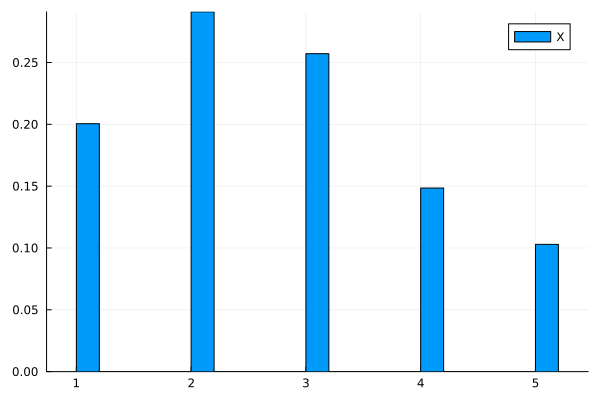

In [2]:
#Lecture 3.1
#Sample from a discrete probability distribution using CDF inversion
x_values=[1,2,3,4,5] #Values the random variable can take
p=[.2,.3,.25,.15,.1] #Probabilities of taking each value
thresholds = [sum(p[1:i]) for i in 1:length(p)] #Add the first i probabilities to find the thresholds for each outcome
dist = Uniform(0,1)
sample_size = 10000
U=rand(dist,sample_size) #Generates a list of uniform random numbers
X=zeros(sample_size) #This will be our list of samples from X
#Now for each uniform variable we generated, find the largest threshold it exceeds and return the appropriate value of x
for i in 1:sample_size
    k = 1
    while U[i]>thresholds[k] #This is the expensive part of the algorithm, as we may have to search through a long list to find the right interval.
        k=k+1
    end
    X[i]=x_values[k]
end
histogram(X,label="X",normalize=:probability)

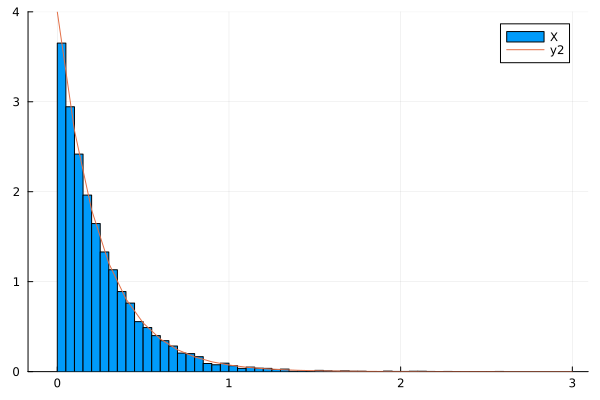

In [3]:
#Lecture 3.2
#Sample from a continuous distribution whose inverse cdf is known.  In this example, we use an exp(L) distribution.
dist = Uniform(0,1)
L = 4 #Parameter in exponential distribution
F_inv(x) = -1/L*log(1-x) #Defines the function for the inverse cdf
sample_size = 10000
U=rand(dist,sample_size)
X = F_inv.(U) #Apply the inverse cdf to all elements of U to generate our samples from X
histogram(X,label="X",normalize=:pdf)
x=0:.1:3
f(x) = 4exp(-4x)
plot!(x,f.(x))

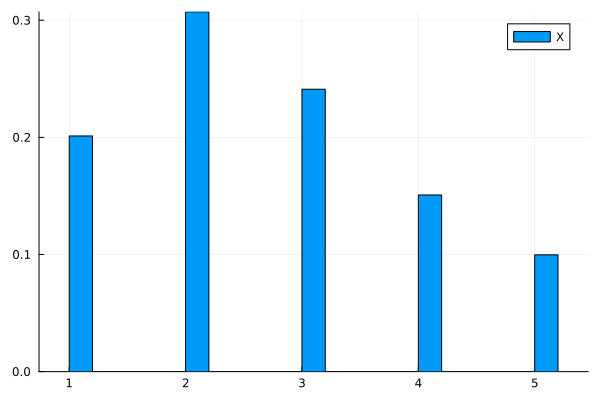

In [4]:
#Lecture 3.3
#Sample from a discrete distribution using the alias method
x_values=[1,2,3,4,5]
p=[.2,.3,.25,.15,.1]
n=length(p)
U=n.*p #List of acceptance probabilities
A=collect(1:n) #List of aliases
#First, we need to set these lists to the correct values.
Over = [i for i in A if U[i]>1] #List of indices with excess probability
Under = [i for i in A if U[i]<1] #List of indices with space for more probability
while length(Over)>0
    A[Under[1]]=Over[1] #Move excess probability from over full index to under full one.
    U[Over[1]]=U[Over[1]]+U[Under[1]]-1
    deleteat!(Under,1) #This entry is now complete, remove it from the list
    if U[Over[1]] == 1
        deleteat!(Over,1) #This index turned out exactly full, so we remove it
    elseif U[Over[1]]<=1 #This entry is no under full, so move it to the proper list
        pushfirst!(Under,Over[1])
        deleteat!(Over,1)
    end
end
#Now that U and A are established, we can actually generate our samples
sample_size = 10000
V=rand(dist,sample_size)
X=zeros(sample_size)
for i in 1:sample_size
    index = floor(Int,n*V[i])+1 #Integer part of U, shifted up 1 to get the index to check
    y = n*V[i]-index+1 #Fractional part of U
    #Now we do the biased coin flip
    if y<U[index]
        X[i]=index
    else
        X[i]=A[index]
    end
end
histogram(X,label="X",normalize=:probability) 

Theoretical Acceptance Probability: 0.6366197723675814
Estimated Acceptance Probability: 0.6367804381049414


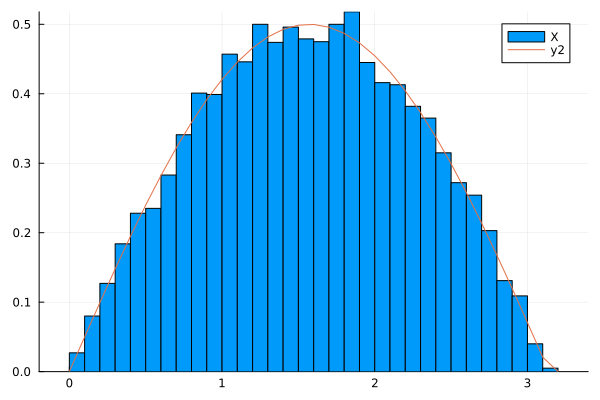

In [5]:
#Lecture 4.1
#Sample from a distribution using the acceptance-rejection method
f(x) = 1/2*sin(x)*(0<=x<=pi) #pdf we want to sample from
g(x) = 1/pi #Proposal pdf
M = pi/2 #1/M is the acceptance probability
dist1 = Uniform(0,pi)
dist2 = Uniform(0,1/2)
sample_size = 10000
count = 0 #We'll keep track of how many rejections happen to compare to the theoretical acceptance probability.
X=zeros(sample_size)
for i in 1:sample_size
    y=Inf #Initialize y so first run of while loop condition is guaranteed to be true.
    x=0
    while y>f(x) #Keep generating points until one is accepted
        count+=1
        x=rand(dist1)
        y=rand(dist2)
    end
    X[i]=x
end
println("Theoretical Acceptance Probability: ",1/M)
println("Estimated Acceptance Probability: ",sample_size/count)
histogram(X,label="X",normalize=:pdf)
plot!(0:.1:3.2,f.(0:.1:3.2))



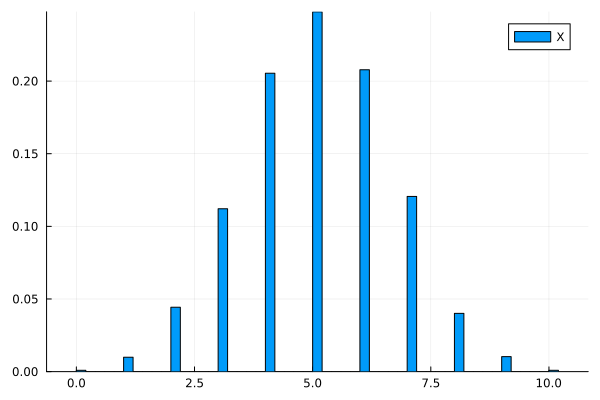

In [6]:
#Lecture 4.2
#Generate a Binomial R.V. through simulation
p = .5 #Success probability
N=10 #Number of trials
dist = Uniform(0,1) 
#While our goal here is to see how a Binomial R.V. is generated, we could set dist to Binomial(n,p).
#See https://juliastats.org/Distributions.jl/stable/univariate/ for a list of some common distributions the distributions package gives access to.
sample_size = 10000
X=zeros(sample_size)
for i in 1:sample_size
    count = 0 #Number of successes
    U=rand(dist,N)
    for u in U
        if u<=p
            count+=1
        end
    end
    X[i]=count
end
histogram(X,label="X",normalize=:probability)

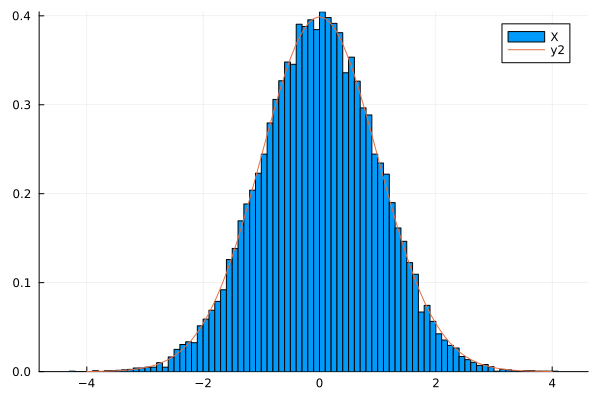

In [7]:
#Lecture 4.3 
#Generate standard normal random variables with the Box-Muller transform
dist = Uniform(0,1)
h_sample_size = 50000 #This will be half the sample size, since we get two normal R.V. from each U1, U2 pair.
X=zeros(2*sample_size)
U1=rand(dist,sample_size)
U2=rand(dist,sample_size)
for i=1:sample_size
    X[2i-1]=cos(2*pi*U1[i])*sqrt(-2log(U2[i]))
    X[2i]=sin(2*pi*U1[i])*sqrt(-2log(U2[i]))
end
histogram(X,label="X",normalize=:pdf)
f(x)=1/sqrt(2*pi)*exp(-x^2/2)
plot!(-4:.1:4,f.(-4:.1:4))